df shape: (7043, 25)
Logistic accuracy: 0.7991483321504613
Random Forest accuracy: 0.7863733144073811
X_train: <class 'numpy.ndarray'> (5634, 22)
X_test : <class 'numpy.ndarray'> (1409, 22)
y_train: <class 'pandas.core.series.Series'> (5634,)
y_test : <class 'pandas.core.series.Series'> (1409,)
log_model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
rf_model : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
log_results keys: dict_keys(['accuracy', 'precision', 'recall', 'f1', 'confusion_matrix', 'classification_report'])
rf_results  keys: dict_keys(['accuracy', 'precision', 'recall', 'f1', 'confusion_matrix', 'classification_report'])


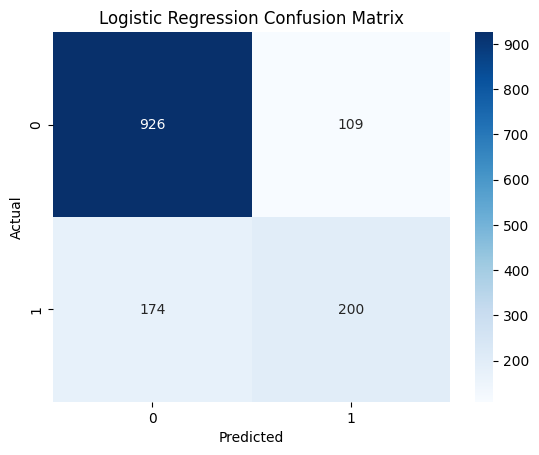

C:\Users\User\AppData\Local\Temp\ipykernel_3120\748806941.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette="viridis")


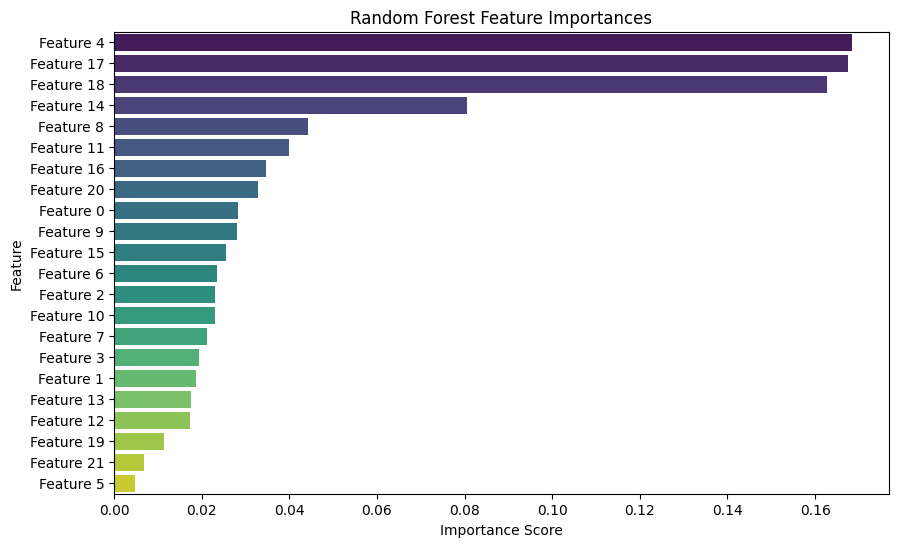

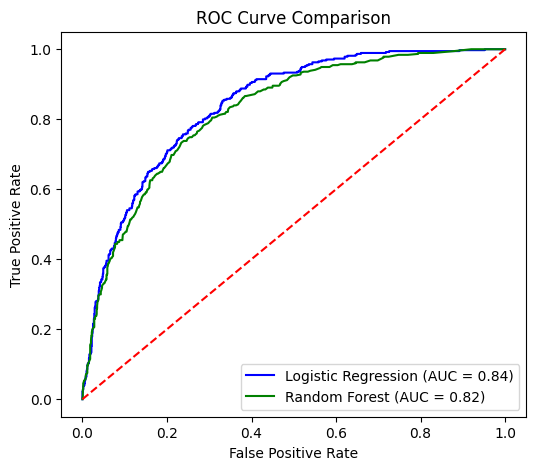

In [2]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Make project root importable
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.model_training import prepare_data, train_logistic_regression, train_random_forest
from src.evaluation import evaluate_model

processed_path = os.path.join(project_root, "data", "processed", "telco_churn_processed.csv")
df = pd.read_csv(processed_path)
print("df shape:", df.shape)


X_train, X_test, y_train, y_test = prepare_data(df)

log_model = train_logistic_regression(X_train, y_train)
rf_model  = train_random_forest(X_train, y_train)

log_results = evaluate_model(log_model, X_test, y_test)
rf_results  = evaluate_model(rf_model,  X_test, y_test)

print("Logistic accuracy:", log_results["accuracy"])
print("Random Forest accuracy:", rf_results["accuracy"])


print("X_train:", type(X_train), getattr(X_train, "shape", None))
print("X_test :", type(X_test), getattr(X_test, "shape", None))
print("y_train:", type(y_train), getattr(y_train, "shape", None))
print("y_test :", type(y_test), getattr(y_test, "shape", None))

print("log_model:", type(log_model))
print("rf_model :", type(rf_model))

print("log_results keys:", log_results.keys())
print("rf_results  keys:", rf_results.keys())





# Confusion matrix heatmap (Logistic Regression)
cm = log_results["confusion_matrix"]

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve comparison (use models directly for probabilities)
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_rf  = rf_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Feature Importance Plot for Random Forest
importances = rf_model.feature_importances_
feature_names = X_train.columns if hasattr(X_train, "columns") else [
    f"Feature {i}" for i in range(X_train.shape[1])
]

indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette="viridis")
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# ROC curves
plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, color="blue",  label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_rf,  tpr_rf,  color="green", label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
